In [242]:
# #dependencies: python3, pip, pandas, numpy, seaborn, matplotlib, tensorflow, sklearn
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib
# !pip install tensorflow
# !pip install sklearn

### Dataset

* Souce: https://www.kaggle.com/datasets/einsteindata4u/covid19

This dataset contains anonymized data from patients seen at the Hospital Israelita Albert Einstein, at São Paulo, Brazil, and who had samples collected to perform the SARS-CoV-2 RT-PCR and additional laboratory tests during a visit to the hospital.

All data were anonymized following the best international practices and recommendations. All clinical data were standardized to have a mean of zero and a unit standard deviation.


Task Details
#### TASK 1
Predict confirmed COVID-19 cases among suspected cases.
Based on the results of laboratory tests commonly collected for a suspected COVID-19 case during a visit to the emergency room, would it be possible to predict the test result for SARS-Cov-2 (positive/negative)?

#### TASK 2
Predict admission to general ward, semi-intensive unit or intensive care unit among confirmed COVID-19 cases.
Based on the results of laboratory tests commonly collected among confirmed COVID-19 cases during a visit to the emergency room, would it be possible to predict which patients will need to be admitted to a general ward, semi-intensive unit or intensive care unit?

The data has 5644 rows and 111 columns.

The percentage of missing values is: 88.1%
Percentage of positive cases: 9.9%


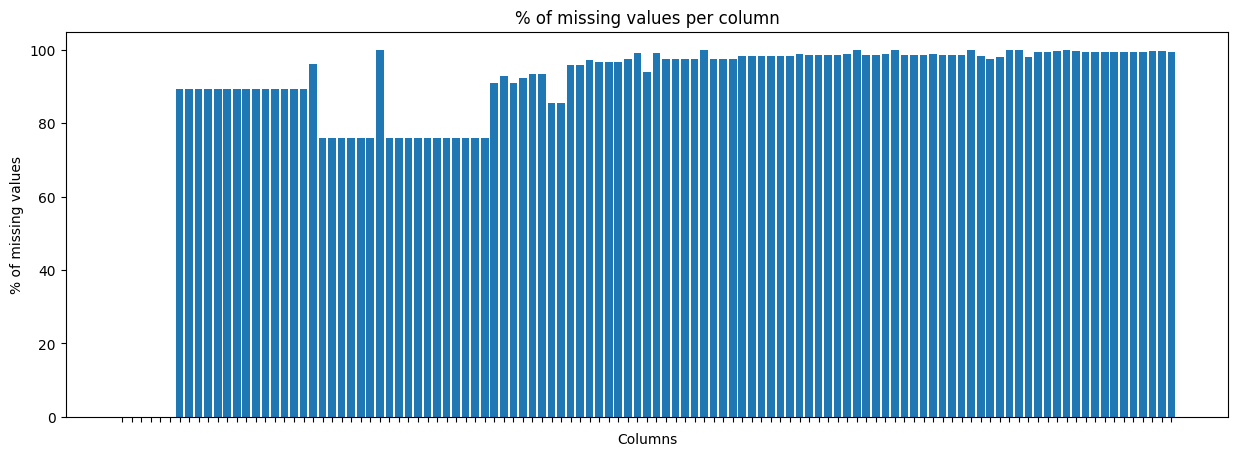

The data has 5644 rows and 111 columns.

The percentage of missing values is: 88.1%
Percentage of positive cases: 9.9%


In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

DATA_PATH = './covid_sp_dataset.xlsx'
data = pd.read_excel(DATA_PATH)

print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.\n')
total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')
print(f'Percentage of positive cases: {data["SARS-Cov-2 exam result"].value_counts()[1]/data.shape[0]*100:.1f}%')

import matplotlib.pyplot as plt

DATA_PATH = './covid_sp_dataset.xlsx'
data = pd.read_excel(DATA_PATH)

fig, axes = plt.subplots(figsize=(15, 5))
axes.bar(data.columns, data.isna().sum()/data.shape[0]*100)
axes.set_title('% of missing values per column')
axes.set_xlabel('Columns')
axes.set_ylabel('% of missing values')
axes.set_xticklabels([])  # Hide x-axis labels
plt.show()

print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.\n')
total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')
print(f'Percentage of positive cases: {data["SARS-Cov-2 exam result"].value_counts()[1]/data.shape[0]*100:.1f}%')


Checking the vacancies map

<Axes: >

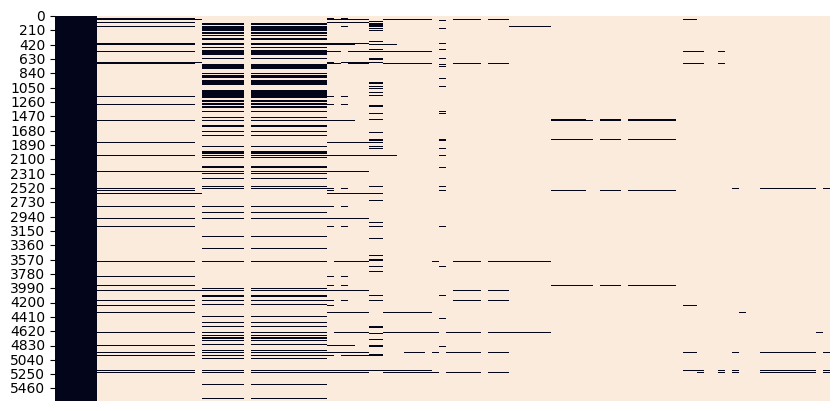

In [244]:
plt.figure(figsize=(10,5))
sns.heatmap(data.isna(), cbar=False, xticklabels=False)

### Data Cleaning

* Consider missing data on categorical exams as negatives, since the med staff considered not necessary
* Remove all atributes with less than 5% of present data
* Remove all rows with more than 20% of missing data
* Transform categorical classes into numeric classes 
* Apply 0 to all interval numeric classes that are empty (considering variance as the value presented) - (**maybe we should try other approachs to this**)

In [245]:
data.drop_duplicates(inplace=True)
for col_name, col in data.items():
    if data[col_name].isna().sum()/data.shape[0] > 0.95:
        data.drop([col_name], axis=1, inplace=True)

In [246]:
bin_attributes = ['Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1',
                'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3',
                'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E',
                'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'Parainfluenza 2', 'Strepto A']

for col_name in bin_attributes:
    data[col_name].fillna('negative', inplace=True)

data.replace(to_replace='not_detected', value=int(0), inplace=True)
data.replace(to_replace='detected', value=int(1), inplace=True)
data.replace(to_replace='negative', value=int(0), inplace=True)
data.replace(to_replace='positive', value=int(1), inplace=True)


In [247]:
data.drop(['Patient ID', 'Influenza A, rapid test', 'Influenza B, rapid test'], axis=1, inplace=True)

In [248]:
patient_admition = data['Patient addmited to semi-intensive unit (1=yes, 0=no)'] * 2 + data['Patient addmited to intensive care unit (1=yes, 0=no)'] *3 + data['Patient addmited to regular ward (1=yes, 0=no)']
data.insert(3, 'Patient admition', patient_admition)
data.drop(['Patient addmited to semi-intensive unit (1=yes, 0=no)', 'Patient addmited to intensive care unit (1=yes, 0=no)', 'Patient addmited to regular ward (1=yes, 0=no)'], axis=1, inplace=True)

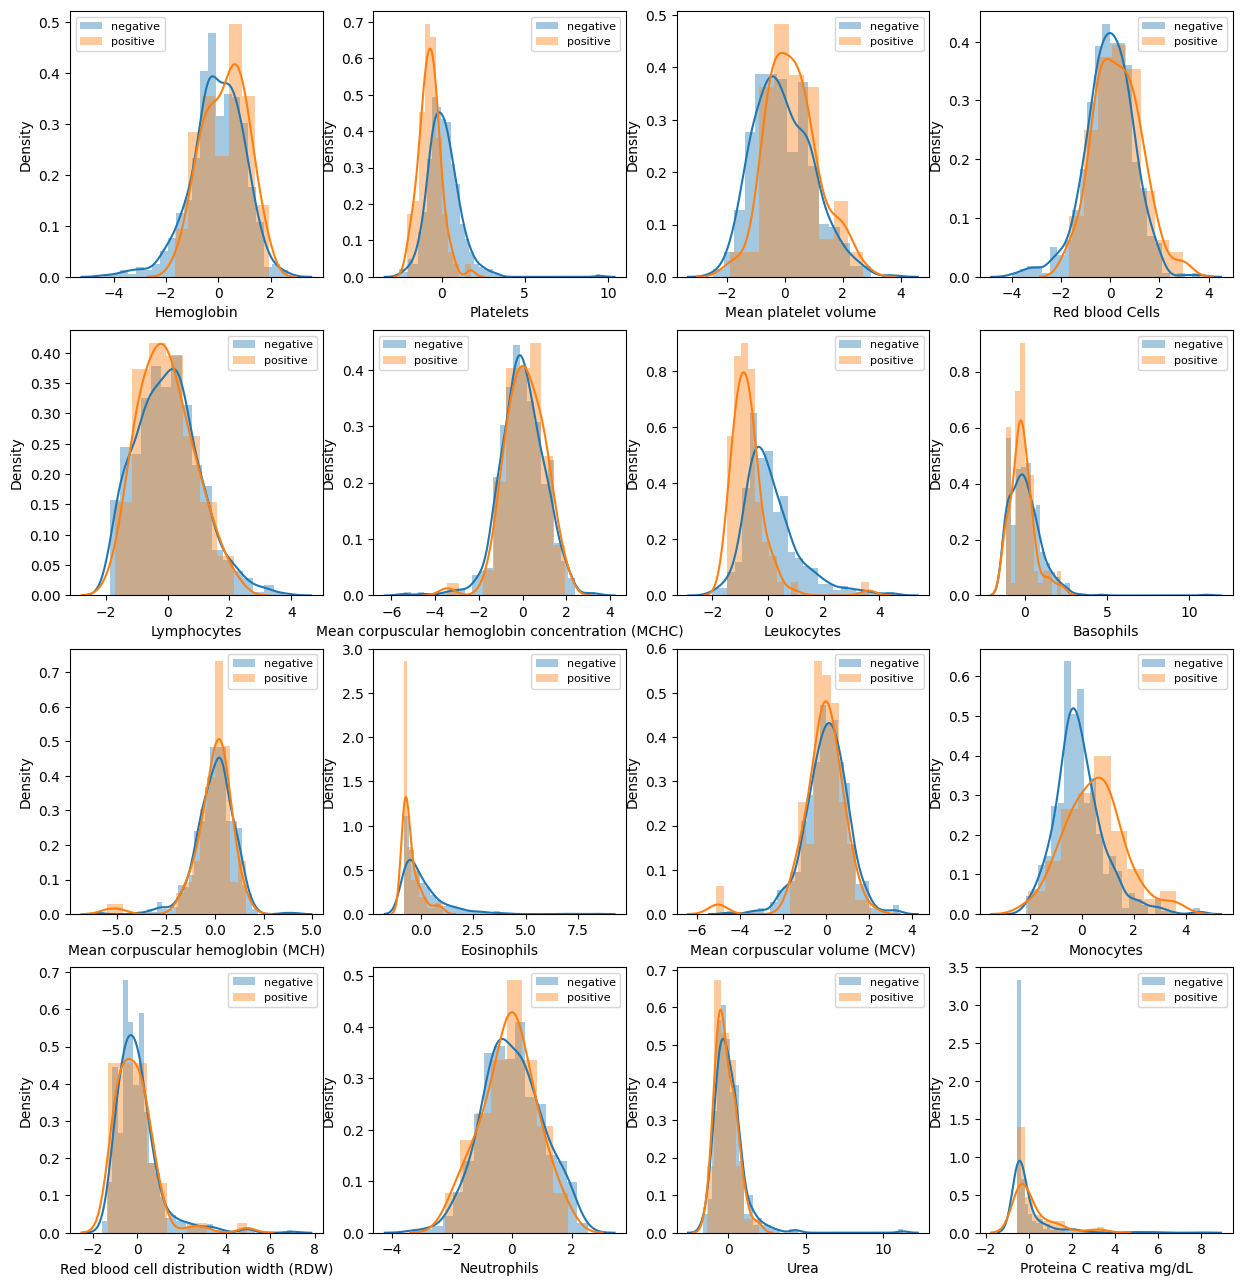

In [249]:
import warnings
warnings.filterwarnings("ignore")
columns = 4
rows = 5
fig=plt.figure(figsize=(15,20))
for i in range(1,len(data.select_dtypes("float").columns)-3):
    x = fig.add_subplot(rows, columns, i)
    sns.distplot(data[data['SARS-Cov-2 exam result']== 0][data.select_dtypes("float").columns[i]], label='negative')
    sns.distplot(data[data['SARS-Cov-2 exam result']== 1][data.select_dtypes("float").columns[i]], label='positive')
    x.legend(prop={'size': 8})

In [250]:
data_large = data.copy()

for row_index, row in data.iterrows():
    if row.isna().sum()/data.shape[1] > 0.20:
        data.drop([row_index], inplace=True)
data.reset_index(inplace=True, drop=True)

for row_index, row in data_large.iterrows():
    if row.isna().sum()/data.shape[1] > 0.20 and row['SARS-Cov-2 exam result'] == 0:
        data_large.drop([row_index], inplace=True)
data_large.reset_index(inplace=True, drop=True)

After the fist treatment, the data has 602 rows and 41 columns.

The percentage of missing values is: 4.2%


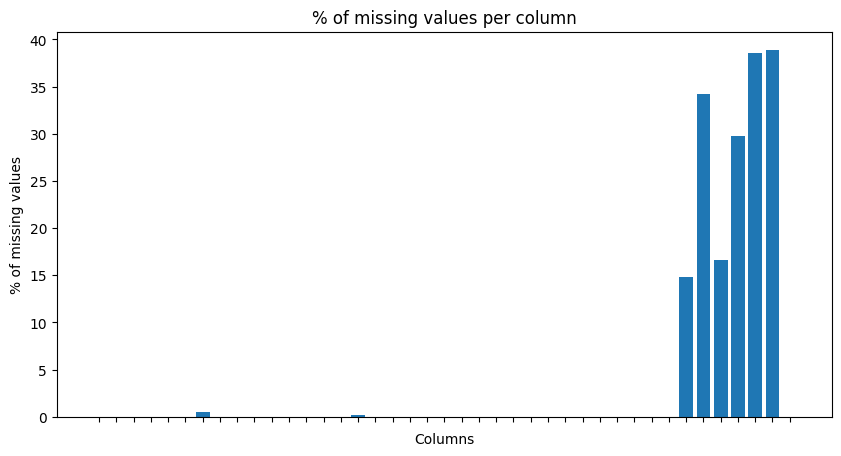

In [251]:
print(f'After the fist treatment, the data has {data.shape[0]} rows and {data.shape[1]} columns.\n')
total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')
fig, axes = plt.subplots(figsize=(10, 5))
axes.bar(data.columns, data.isna().sum()/data.shape[0]*100)
axes.set_title('% of missing values per column')
axes.set_xlabel('Columns')
axes.set_ylabel('% of missing values')
axes.set_xticklabels([])  # Hide x-axis labels
plt.xticks(rotation=90)
plt.show()

After the fist treatment, the data_large has 1077 rows and 41 columns.

The percentage of missing values is: 23.9%


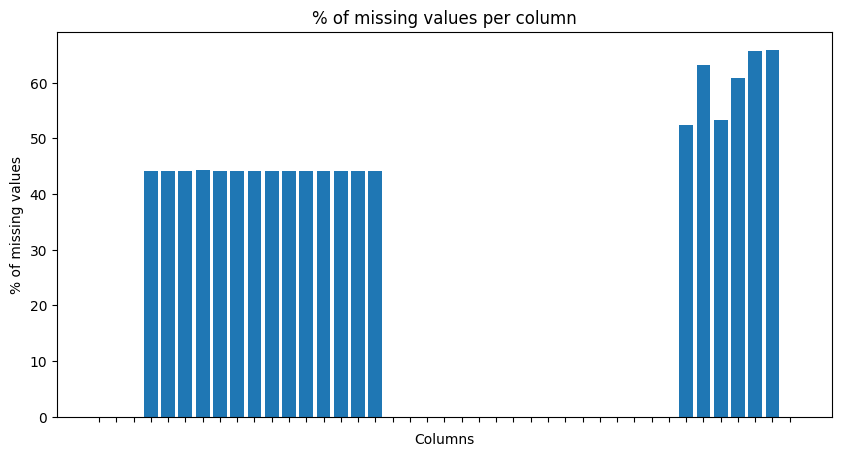

In [252]:
print(f'After the fist treatment, the data_large has {data_large.shape[0]} rows and {data_large.shape[1]} columns.\n')
total_na_percentage = data_large.isna().sum().sum() / (data_large.shape[0] * data_large.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')
fig, axes = plt.subplots(figsize=(10, 5))
axes.bar(data_large.columns, data_large.isna().sum()/data_large.shape[0]*100)
axes.set_title('% of missing values per column')
axes.set_xlabel('Columns')
axes.set_ylabel('% of missing values')
axes.set_xticklabels([])  # Hide x-axis labels
plt.xticks(rotation=90)
plt.show()

In [253]:
data.loc[data['SARS-Cov-2 exam result'] == 1] = data[data['SARS-Cov-2 exam result'] == 1].fillna(data[data['SARS-Cov-2 exam result'] == 1].mean())
data.loc[data['SARS-Cov-2 exam result'] == 0] = data[data['SARS-Cov-2 exam result'] == 0].fillna(data[data['SARS-Cov-2 exam result'] == 0].mean())

data_large.loc[data_large['SARS-Cov-2 exam result'] == 1] = data_large[data_large['SARS-Cov-2 exam result'] == 1].fillna(data_large[data_large['SARS-Cov-2 exam result'] == 1].mean())
data_large.loc[data_large['SARS-Cov-2 exam result'] == 0] = data_large[data_large['SARS-Cov-2 exam result'] == 0].fillna(data_large[data_large['SARS-Cov-2 exam result'] == 0].mean())


In [254]:
# data.to_csv('./covid_sp_dataset_treated.csv', index=True)
# data.to_csv('./covid_sp_dataset_large_treated.csv', index=True)

Analysing the data distribution for both problems

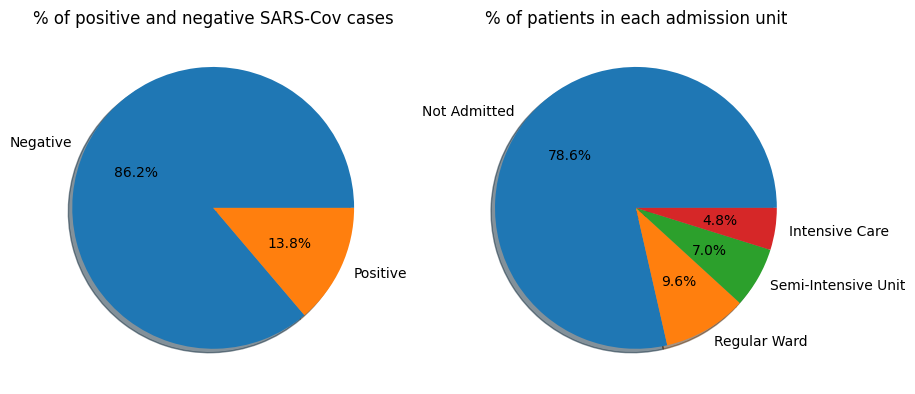

The data has 602 rows and 41 columns.

The percentage of missing values is: 0.0%


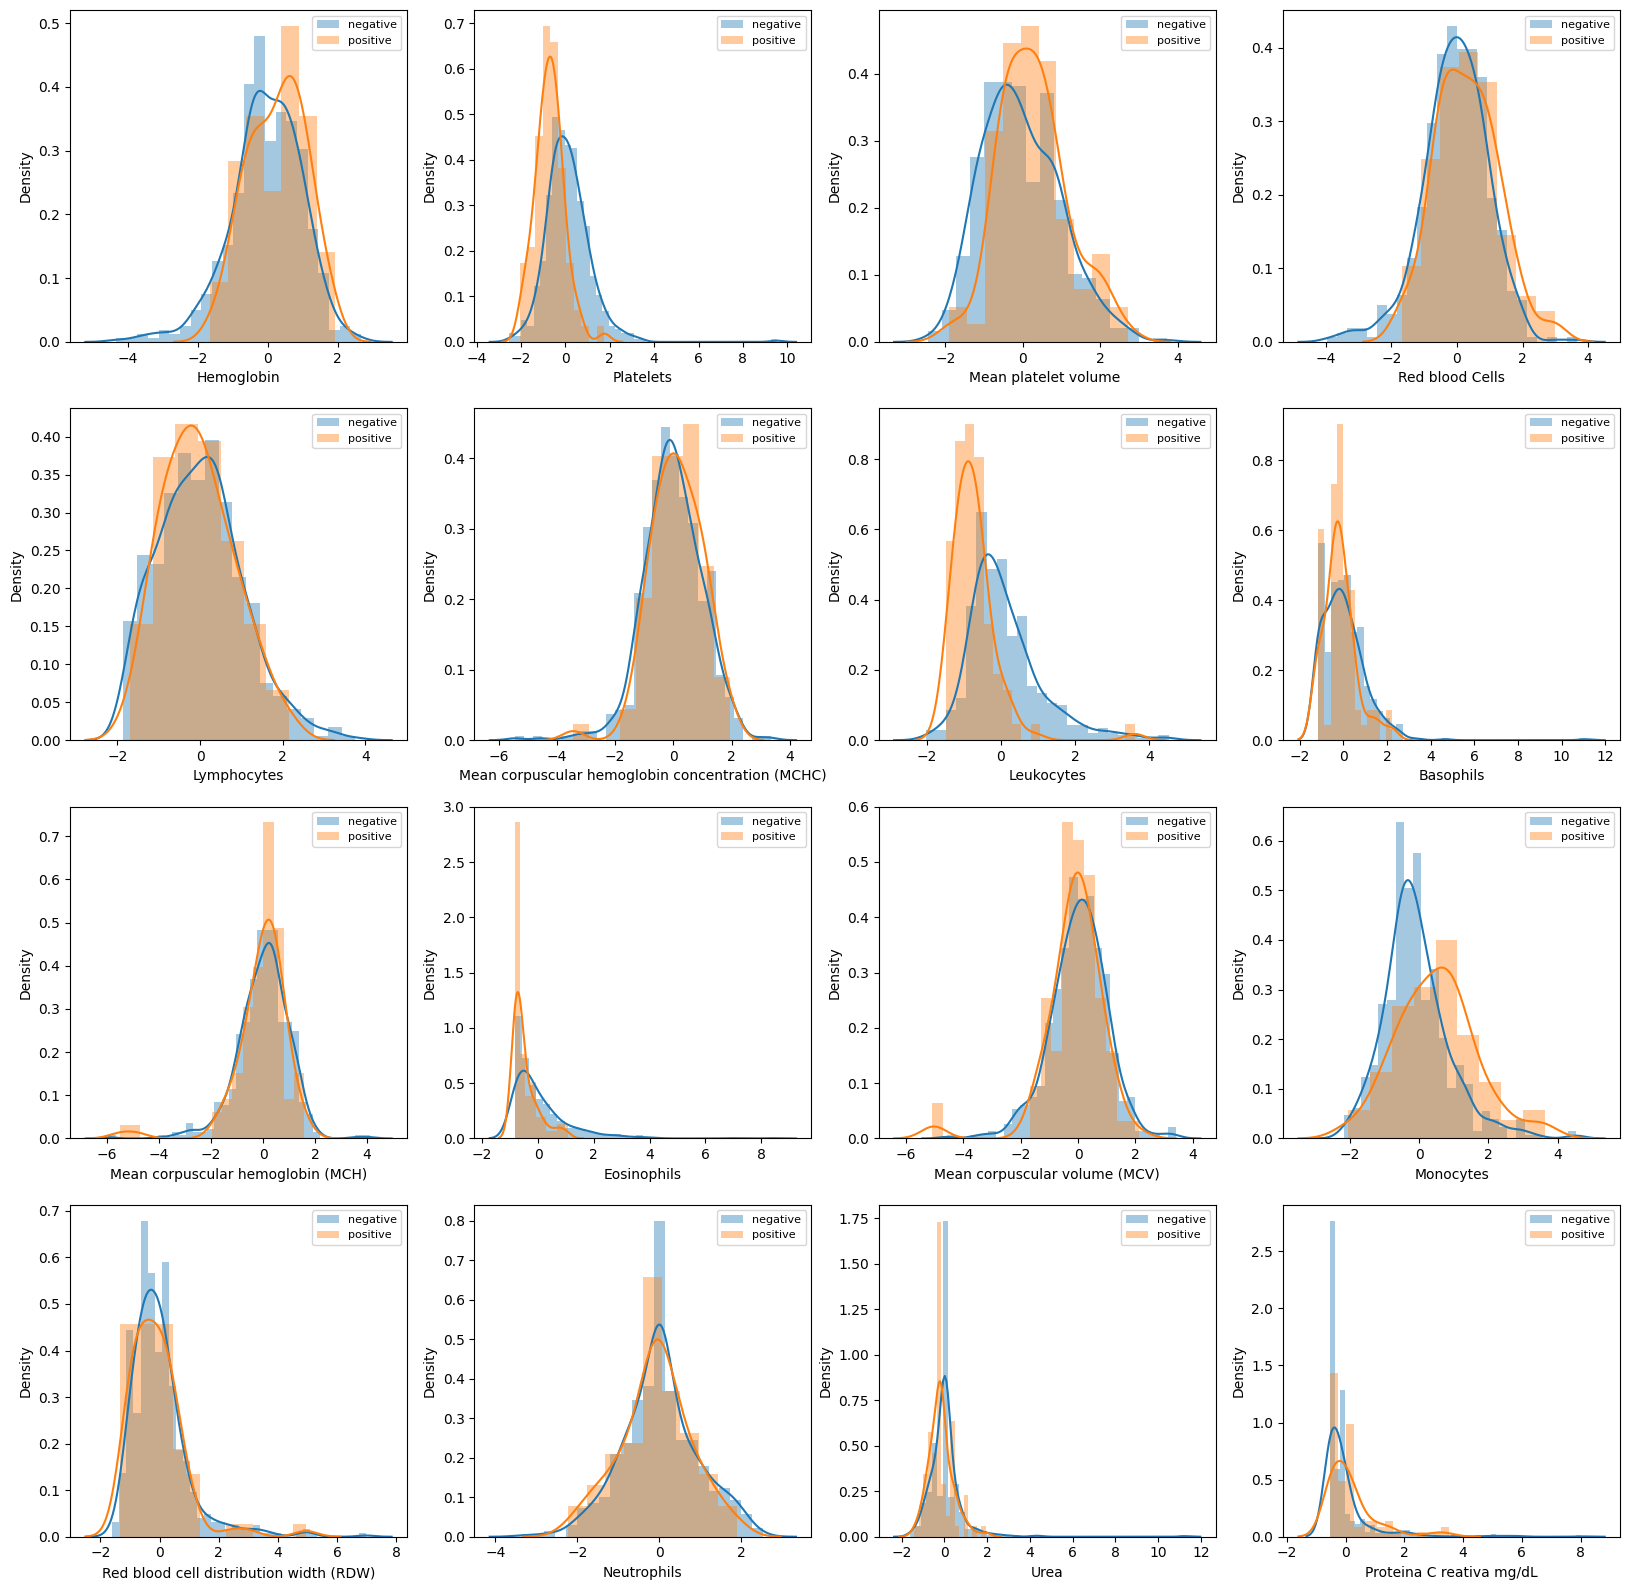

In [269]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
labels = ['Negative', 'Positive']
sizes = [data['SARS-Cov-2 exam result'].value_counts()[0], data['SARS-Cov-2 exam result'].value_counts()[1]]
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
axes[0].set_title('% of positive and negative SARS-Cov cases')
labels = ['Not Admitted', 'Regular Ward', 'Semi-Intensive Unit', 'Intensive Care']
sizes = [data['Patient admition'].value_counts()[0], data['Patient admition'].value_counts()[1], data['Patient admition'].value_counts()[2], data['Patient admition'].value_counts()[3]]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
axes[1].set_title('% of patients in each admission unit')
plt.show()

columns = 4
rows = 5

fig=plt.figure(figsize=(20,25))
for i in range(1,len(data.select_dtypes("float").columns)-3):
    x = fig.add_subplot(rows, columns, i)
    sns.distplot(data[data['SARS-Cov-2 exam result']== 0][data.select_dtypes("float").columns[i]], label='negative')
    sns.distplot(data[data['SARS-Cov-2 exam result']== 1][data.select_dtypes("float").columns[i]], label='positive')
    x.legend(prop={'size': 8})

print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.\n')
total_na_percentage = data.isna().sum().sum() / (data.shape[0] * data.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')

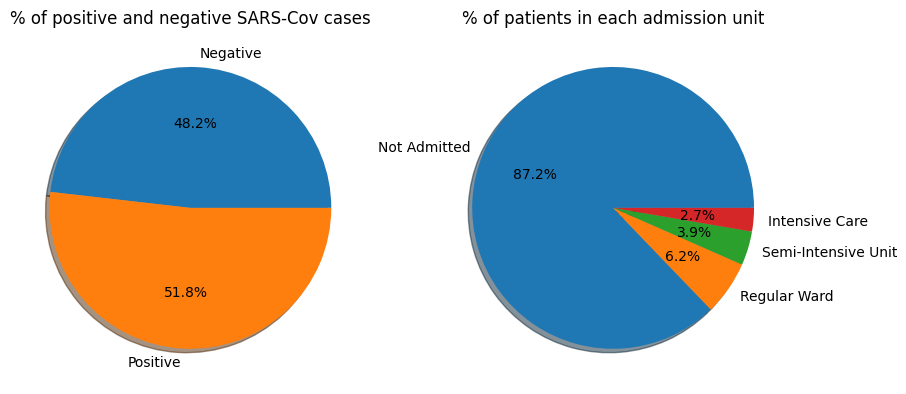

The data has 1077 rows and 41 columns.

The percentage of missing values is: 0.0%


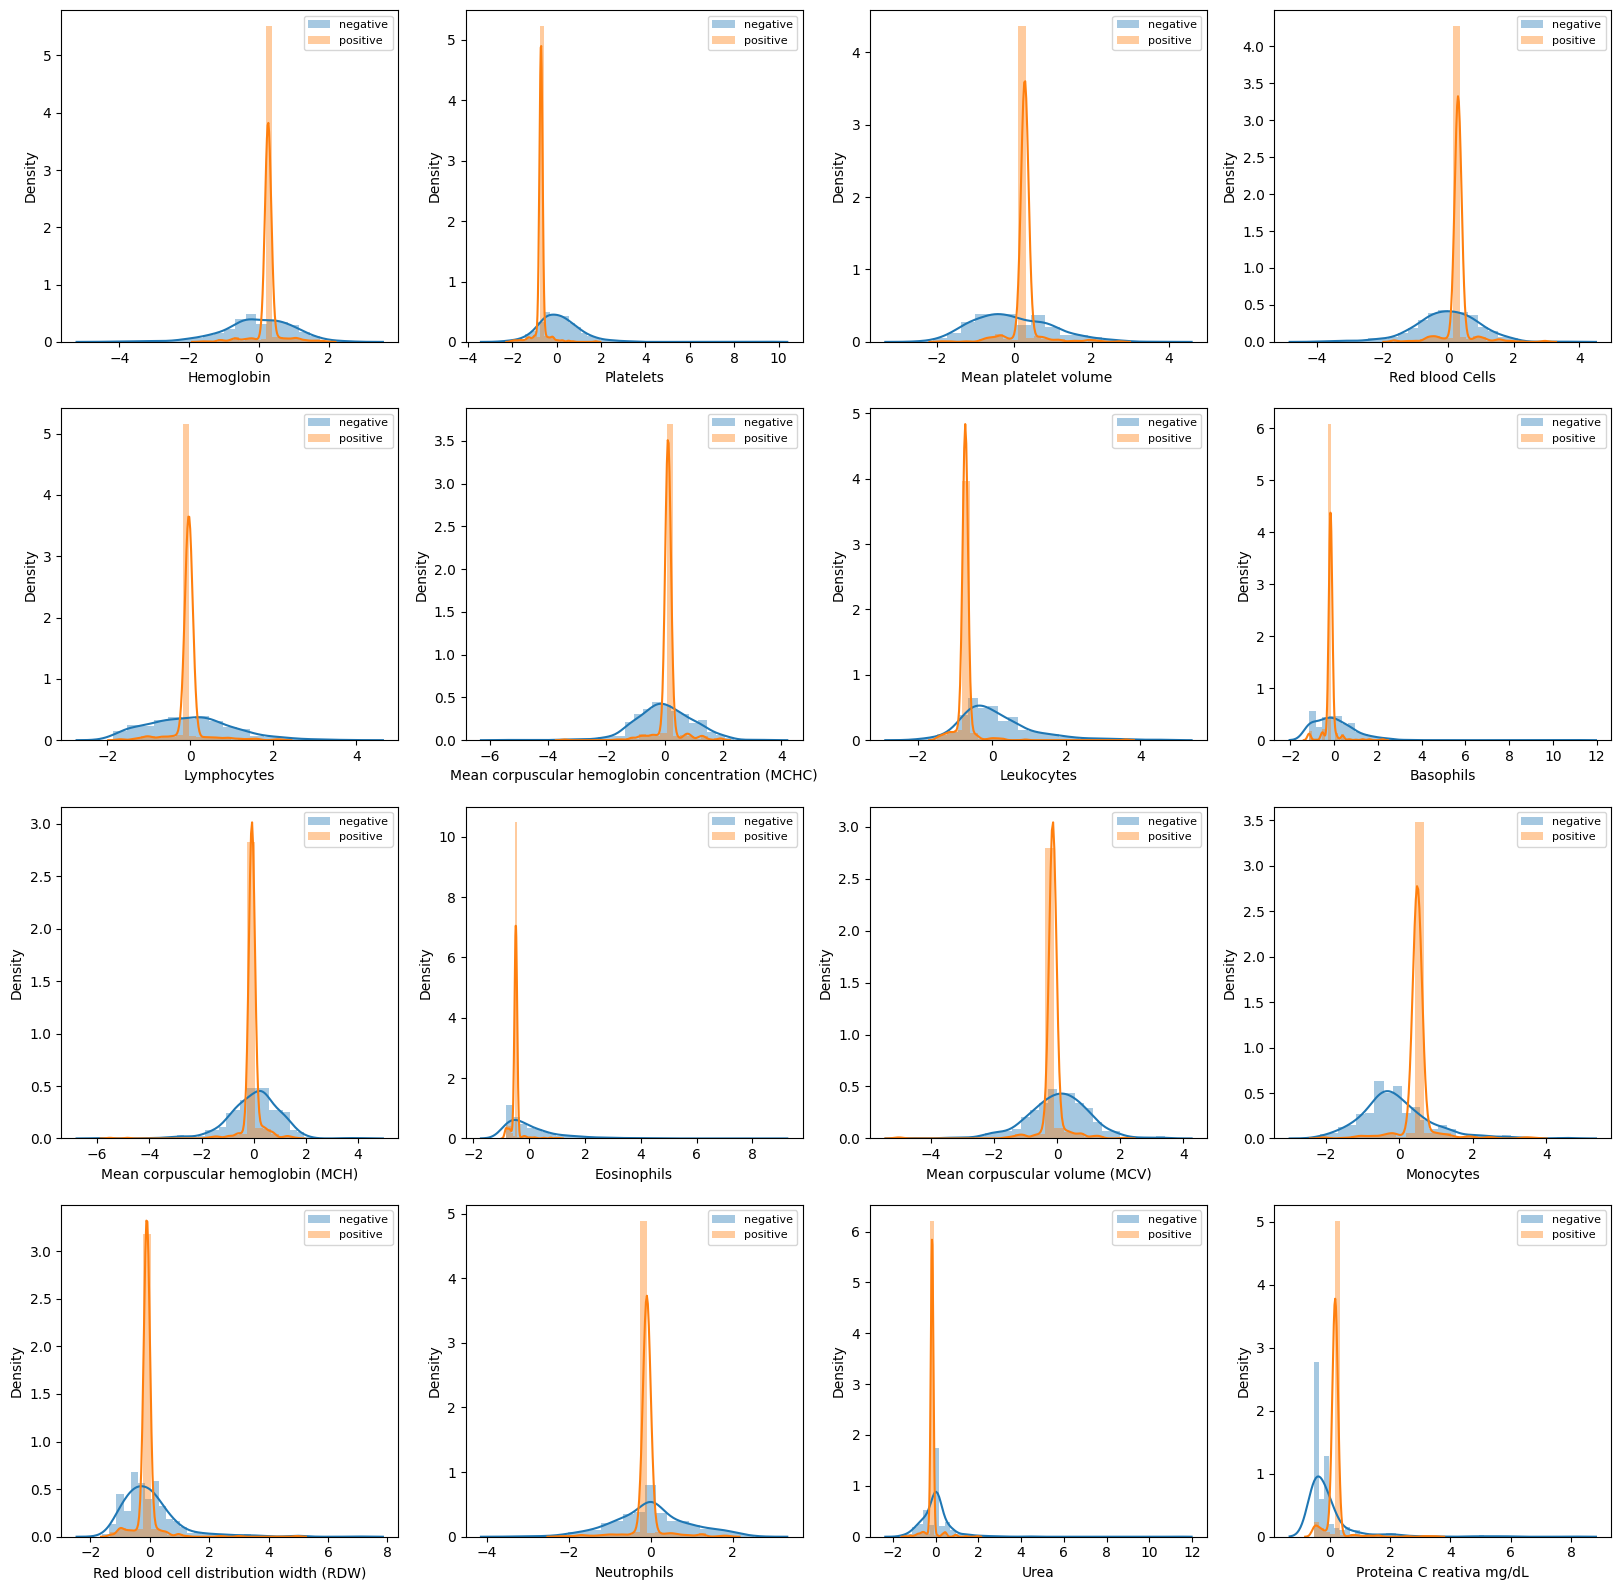

In [256]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
labels = ['Negative', 'Positive']
sizes = [data_large['SARS-Cov-2 exam result'].value_counts()[0], data_large['SARS-Cov-2 exam result'].value_counts()[1]]
axes[0].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
axes[0].set_title('% of positive and negative SARS-Cov cases')
labels = ['Not Admitted', 'Regular Ward', 'Semi-Intensive Unit', 'Intensive Care']
sizes = [data_large['Patient admition'].value_counts()[0], data_large['Patient admition'].value_counts()[1], data_large['Patient admition'].value_counts()[2], data_large['Patient admition'].value_counts()[3]]
axes[1].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
axes[1].set_title('% of patients in each admission unit')
plt.show()

columns = 4
rows = 5

fig=plt.figure(figsize=(20,25))
for i in range(1,len(data_large.select_dtypes("float").columns)-3):
    x = fig.add_subplot(rows, columns, i)
    sns.distplot(data_large[data_large['SARS-Cov-2 exam result']== 0][data_large.select_dtypes("float").columns[i]], label='negative')
    sns.distplot(data_large[data_large['SARS-Cov-2 exam result']== 1][data_large.select_dtypes("float").columns[i]], label='positive')
    x.legend(prop={'size': 8})

print(f'The data has {data_large.shape[0]} rows and {data_large.shape[1]} columns.\n')
total_na_percentage = data_large.isna().sum().sum() / (data_large.shape[0] * data_large.shape[1]) * 100
print(f'The percentage of missing values is: {total_na_percentage:.1f}%')

### Data organizatrion
* Split target for both problems (Covid result and patient admition)
* MinMax scalling of data (dat is already normalized)
* Creating specifc dataframes for each problem, to be separated into x and y by KFold

In [257]:
data_y_sars = data.iloc[:, 1]
data_y_admition = data.iloc[:, 2]
data_x = data.drop(['SARS-Cov-2 exam result', 'Patient admition'], axis=1)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
for col_name, col in data_x.items():
    data_x[col_name] = scaler.fit_transform(data_x[col_name].values.reshape(-1,1))

sars_data = pd.concat([data_x, data_y_sars], axis=1)
admition_data = pd.concat([data_x, data_y_admition], axis=1)

########################################### DATA_LARGE ###########################################

data_y_sars_large = data.iloc[:, 1]
data_y_admition_large = data.iloc[:, 2]
data_x_large = data_large.drop(['SARS-Cov-2 exam result', 'Patient admition'], axis=1)

for col_name, col in data_x_large.items():
    data_x_large[col_name] = scaler.fit_transform(data_x_large[col_name].values.reshape(-1,1))

sars_data_large = pd.concat([data_x_large, data_y_sars_large], axis=1)
admition_data_large = pd.concat([data_x_large, data_y_admition_large], axis=1)



Using KFold Cross Validation

In [258]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=True, random_state=13)

Defining evaluation for model fit and scores and cross_validation for kfold and train-test division within each fold

In [259]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def evaluate(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_predicted = model.predict(x_test)
    recall = recall_score(y_test, y_predicted)
    acc = accuracy_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    return acc, recall, f1

def cross_validation(kf, model, data):
    acc = []
    recall = []
    f1 = []
    for train_index, test_index in kf.split(data):
        x_train, x_test = data.iloc[train_index, :-1], data.iloc[test_index, :-1]
        y_train, y_test = data.iloc[train_index, -1], data.iloc[test_index, -1]
        acc_, recall_, f1_ = evaluate(model, x_train, x_test, y_train, y_test)
        acc.append(acc_)
        recall.append(recall_)
        f1.append(f1_)
    print(f'Model Params = {model.get_params()}')
    print(f'Accuracy = {np.mean(acc):.3f} +/- {np.std(acc):.3f}')
    print(f'Recall = {np.mean(recall):.3f} +/- {np.std(recall):.3f}')
    print(f'F1 = {np.mean(f1):.3f} +/- {np.std(f1):.3f}')
    print(f'Best Accuracy = {np.max(acc):.3f}')
    print(f'Best Recall = {np.max(recall):.3f}')
    print(f'Best F1 = {np.max(f1):.3f}')
    return np.mean(acc), np.mean(recall), np.mean(f1), np.max(acc), np.max(recall), np.max(f1)

In [260]:
models = []
acc_results = []
recall_results = []
f1_results = []

### K Nearest Neighbors

In [261]:
knn_model = KNeighborsClassifier(n_neighbors=5)
acc_knn, recall_knn, f1_knn, max_acc_knn, max_recall_knn, max_f1_knn = cross_validation(kf, knn_model, sars_data)

models.append('KNN')
acc_results.append(max_acc_knn)
recall_results.append(max_recall_knn)
f1_results.append(max_f1_knn)

Model Params = {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Accuracy = 0.864 +/- 0.031
Recall = 0.295 +/- 0.100
F1 = 0.370 +/- 0.137
Best Accuracy = 0.893
Best Recall = 0.389
Best F1 = 0.519


### Decision Tree Classifier

In [262]:
dtc_model = DecisionTreeClassifier(random_state=13)
acc_dtc, recall_dtc, f1_dtc, max_acc_dtc, max_recall_dtc, max_f1_dtc = cross_validation(kf, dtc_model, sars_data)

models.append('DTC')
acc_results.append(max_acc_dtc)
recall_results.append(max_recall_dtc)
f1_results.append(max_f1_dtc)

Model Params = {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 13, 'splitter': 'best'}
Accuracy = 0.864 +/- 0.022
Recall = 0.468 +/- 0.111
F1 = 0.473 +/- 0.084
Best Accuracy = 0.892
Best Recall = 0.632
Best F1 = 0.615


### Multi Layer Perceptron

In [263]:
mlp_model = MLPClassifier(hidden_layer_sizes=[50, 50, 50], activation='relu', solver ='adam', max_iter=10000000, learning_rate_init=0.1, alpha=0.02, learning_rate='adaptive')
acc_mlp, recall_mlp, f1_mlp, max_acc_mlp, max_recall_mlp, max_f1_mlp = cross_validation(kf, mlp_model, sars_data)

models.append('SKL_MLP')
acc_results.append(max_acc_mlp)
recall_results.append(max_recall_mlp)
f1_results.append(max_f1_mlp)

Model Params = {'activation': 'relu', 'alpha': 0.02, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': [50, 50, 50], 'learning_rate': 'adaptive', 'learning_rate_init': 0.1, 'max_fun': 15000, 'max_iter': 10000000, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}
Accuracy = 0.879 +/- 0.040
Recall = 0.382 +/- 0.236
F1 = 0.414 +/- 0.241
Best Accuracy = 0.917
Best Recall = 0.632
Best F1 = 0.645


### Random Forest Classifier

In [264]:
rfc_model = RandomForestClassifier(n_estimators=100, max_depth=10)
acc_rfc, recall_rfc, f1_rfc, max_acc_rfc, max_recall_rfc, max_f1_rfc = cross_validation(kf, rfc_model, sars_data)

models.append('RFC')
acc_results.append(max_acc_rfc)
recall_results.append(max_recall_rfc)
f1_results.append(max_f1_rfc)

Model Params = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy = 0.905 +/- 0.022
Recall = 0.345 +/- 0.104
F1 = 0.487 +/- 0.119
Best Accuracy = 0.933
Best Recall = 0.500
Best F1 = 0.643


Using SKLearn, this was the best result that we could achieve. And it follows the expected considering the lack of data on the dataset.

As a comparison, the following implementation on kaggle has similar results (with the best F1 score of 0.574): https://www.kaggle.com/code/aurbcd/covid19-data-science-exercise

### Using Tensor Flow

Creating the model

In [265]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from keras import backend as K

model = Sequential()
model.add(Dense(90, input_dim=sars_data.shape[1]-1, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['Accuracy', 'Recall', 'Precision'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 90)                3600      
                                                                 
 dropout_4 (Dropout)         (None, 90)                0         
                                                                 
 dense_7 (Dense)             (None, 50)                4550      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8201 (32.04 KB)
Trainable params: 8201 (32.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [266]:
from sklearn.metrics import confusion_matrix,classification_report

def evaluate_tf(model, x_train, x_test, y_train, y_test, batch_size, epochs):
    model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(x_test, y_test))
    uu, acc, recall, precision = model.evaluate(x_test, y_test, verbose=0 )
    f1 = 2 * (precision * recall) / (precision + recall)
    return acc, recall, f1


def cross_validation_tf(kf, model, data, batch_size, epochs):
    acc = []
    recall = []
    f1 = []
    for train_index, test_index in kf.split(data):
        x_train, x_test = data.iloc[train_index, :-1], data.iloc[test_index, :-1]
        y_train, y_test = data.iloc[train_index, -1], data.iloc[test_index, -1]
        acc_, recall_, f1_ = evaluate_tf(model, x_train, x_test, y_train, y_test, batch_size, epochs)
        acc.append(acc_)
        recall.append(recall_)
        f1.append(f1_)
    print(f'acc = {np.mean(acc):.3f} +/- {np.std(acc):.3f}')
    print(f'recall = {np.mean(recall):.3f} +/- {np.std(recall):.3f}')
    print(f'f1 = {np.mean(f1):.3f} +/- {np.std(f1):.3f}')
    print(f'Best acc = {np.max(acc):.3f}')
    print(f'Best recall = {np.max(recall):.3f}')
    print(f'Best f1 = {np.max(f1):.3f}')
    return np.mean(recall), np.mean(acc), np.mean(f1), np.max(recall), np.max(acc), np.max(f1)

In [267]:
BATCH_SIZE = 32
EPOCHS = 500
recall_tf, acc_tf, f1_tf, max_acc_tf, max_recall_tf, max_f1_tf = cross_validation_tf(kf, model, sars_data, BATCH_SIZE, EPOCHS)

models.append('TF_MLP')
acc_results.append(max_acc_tf)
recall_results.append(max_recall_tf)
f1_results.append(max_f1_tf)

acc = 0.924 +/- 0.023
recall = 0.626 +/- 0.113
f1 = 0.679 +/- 0.117
Best acc = 0.950
Best recall = 0.810
Best f1 = 0.829


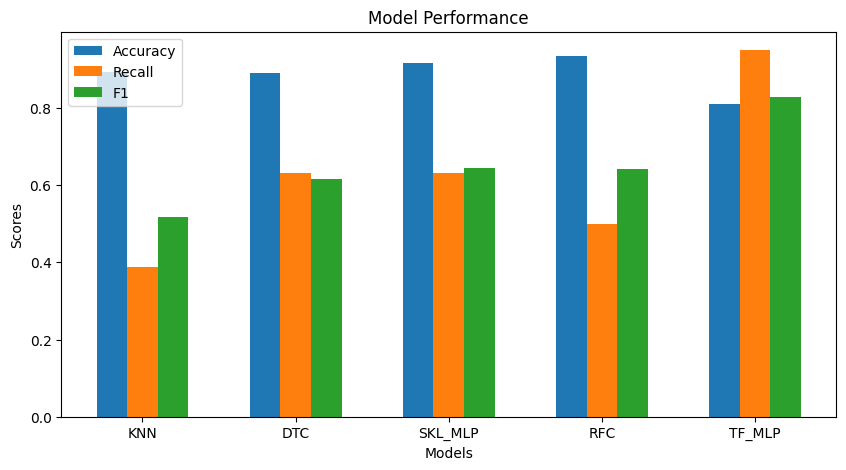

In [274]:
results = pd.DataFrame({'Model': models, 'Accuracy': acc_results, 'Recall': recall_results, 'F1': f1_results})
results

fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.2
bar1 = np.arange(len(results['Model']))
bar2 = [x + bar_width for x in bar1]
bar3 = [x + bar_width for x in bar2]
ax.bar(bar1, results['Accuracy'], width=bar_width, label='Accuracy')
ax.bar(bar2, results['Recall'],  width=bar_width, label='Recall')
ax.bar(bar3, results['F1'],  width=bar_width, label='F1')
ax.set_xticks([r + bar_width for r in range(len(results['Accuracy']))])
ax.set_xticklabels(results['Model'])
ax.set_title('Model Performance')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.legend()
plt.show()